In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
data['total'] = data['math score'] + data['reading score'] + data['writing score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [4]:
data.columns = data.columns.str.replace(' ', '_')
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
data.columns = data.columns.str.replace('/', '_')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [7]:
data.to_csv('data/StudentsPerformanceModified.csv', index = False)

In [8]:
data = pd.read_csv('data/StudentsPerformanceModified.csv')

In [9]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [10]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total'],
      dtype='object')

In [11]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [12]:
X = data.drop(columns=['total'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:

print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   

KeyError: 'race/ethnicity'

In [14]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [15]:
y = data['total']
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total, Length: 1000, dtype: int64

In [16]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features)       
    ]
)
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 20)

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in tqdm(range(len(list(models)))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

  0%|          | 0/9 [00:00<?, ?it/s]

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0644
- Mean Absolute Error: 0.8505
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1139
- Mean Absolute Error: 0.8764
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0241
- Mean Absolute Error: 0.0195
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0264
- Mean Absolute Error: 0.0201
- R2 Score: 1.0000




 44%|████▍     | 4/9 [00:00<00:00, 17.43it/s]

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.7719
- Mean Absolute Error: 5.3040
- R2 Score: 0.9745
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.2119
- Mean Absolute Error: 6.8500
- R2 Score: 0.9560


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8903
- Mean Absolute Error: 3.2750
- R2 Score: 0.9876




 67%|██████▋   | 6/9 [00:00<00:00,  8.68it/s]

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8397
- Mean Absolute Error: 0.5546
- R2 Score: 0.9996
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.4026
- Mean Absolute Error: 1.5396
- R2 Score: 0.9940


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1276
- Mean Absolute Error: 0.0919
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.6262
- Mean Absolute Error: 1.5664
- R2 Score: 0.9964




100%|██████████| 9/9 [00:02<00:00,  4.28it/s]

CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3180
- Mean Absolute Error: 0.2558
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.5528
- Mean Absolute Error: 0.9921
- R2 Score: 0.9935


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.3224
- Mean Absolute Error: 4.1719
- R2 Score: 0.9842
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6307
- Mean Absolute Error: 4.7521
- R2 Score: 0.9772




In [21]:
res = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
res

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999357
6,XGBRegressor,0.996425
5,Random Forest Regressor,0.993999
7,CatBoosting Regressor,0.993457
4,Decision Tree,0.987604
8,AdaBoost Regressor,0.977211
3,K-Neighbors Regressor,0.956016


In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


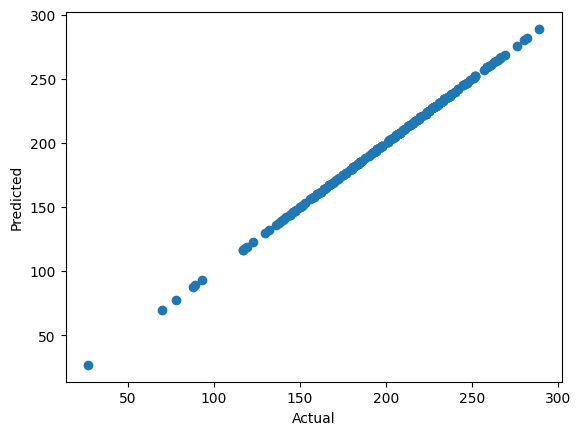

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

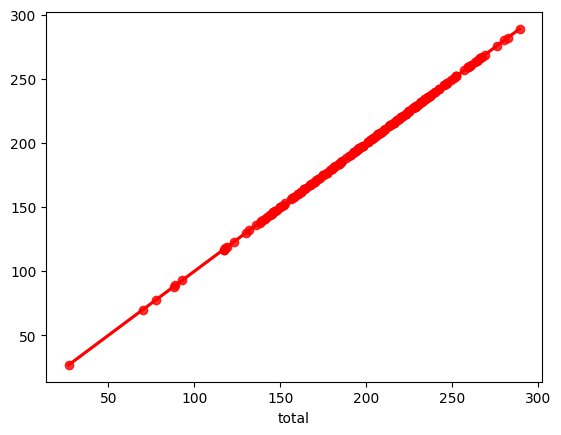

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [25]:
pred_data=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_data

,Actual Value,Predicted Value,Difference
521,261,261.0,-5.684342e-14
737,192,192.0,2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,-2.842171e-14
...,...,...,...
408,165,165.0,5.684342e-14
332,171,171.0,5.684342e-14
208,231,231.0,0.000000e+00
613,216,216.0,-2.842171e-14
